In [17]:
import numpy as np
import pandas as pd
import quandl 
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
from fbprophet import Prophet
import pickle
from sklearn.preprocessing import MinMaxScaler

In [4]:
quandl.ApiConfig.api_key = 'umQRdEcxaVzMFsfVPJ_y'
register_matplotlib_converters()

In [54]:
data = quandl.get('WIKI/REGN')

In [55]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio',
       'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume'],
      dtype='object')

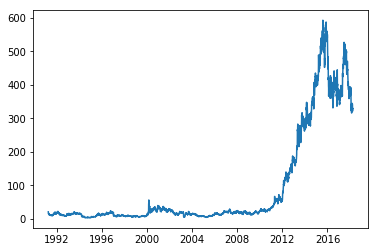

In [56]:
plt.plot(data['Adj. Close'])

In [57]:
d = data.reset_index()[['Date', 'Adj. Close']]
d.columns = ['ds', 'y']
d.head()

,ds,y
0,1991-04-02,21.13
1,1991-04-03,18.25
2,1991-04-04,18.00
3,1991-04-05,17.75
4,1991-04-08,17.63


In [44]:
scaler = MinMaxScaler()
d.y = scaler.fit_transform(d.y.values.reshape(-1, 1))
d

,ds,y
0,1991-04-02,0.030760
1,1991-04-03,0.025874
2,1991-04-04,0.025450
3,1991-04-05,0.025025
4,1991-04-08,0.024822
5,1991-04-09,0.022056
6,1991-04-10,0.021853
7,1991-04-11,0.019936
8,1991-04-12,0.022480
9,1991-04-15,0.022277


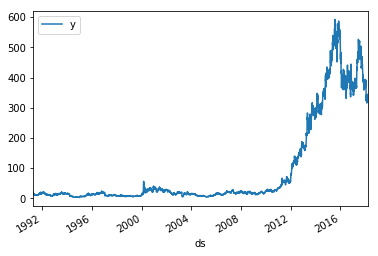

In [58]:
d.plot(x='ds', y='y')

In [67]:
m = Prophet(changepoint_prior_scale=0.5, yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True, )
m.fit(d)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()


In [68]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
7159,2019-03-23
7160,2019-03-24
7161,2019-03-25
7162,2019-03-26
7163,2019-03-27


In [69]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
7159,2019-03-23,541.221866,478.943606,580.840717,526.401385,554.772332,-11.774369,-11.774369,-11.774369,-6.14195,-6.14195,-6.14195,0.767744,0.767744,0.767744,-6.400163,-6.400163,-6.400163,0.0,0.0,0.0,529.447497
7160,2019-03-24,541.347179,477.435762,576.653577,526.472006,554.969596,-11.640771,-11.640771,-11.640771,-6.14195,-6.14195,-6.14195,0.767743,0.767743,0.767743,-6.266564,-6.266564,-6.266564,0.0,0.0,0.0,529.706409
7161,2019-03-25,541.472493,480.991289,577.221435,526.542626,555.182914,-12.300753,-12.300753,-12.300753,-6.14195,-6.14195,-6.14195,-0.050661,-0.050661,-0.050661,-6.108142,-6.108142,-6.108142,0.0,0.0,0.0,529.171740
7162,2019-03-26,541.597807,478.286294,578.559257,526.613246,555.387492,-12.411773,-12.411773,-12.411773,-6.14195,-6.14195,-6.14195,-0.343983,-0.343983,-0.343983,-5.925840,-5.925840,-5.925840,0.0,0.0,0.0,529.186034
7163,2019-03-27,541.723120,476.859227,578.437593,526.683866,555.586541,-11.972890,-11.972890,-11.972890,-6.14195,-6.14195,-6.14195,-0.109864,-0.109864,-0.109864,-5.721076,-5.721076,-5.721076,0.0,0.0,0.0,529.750231


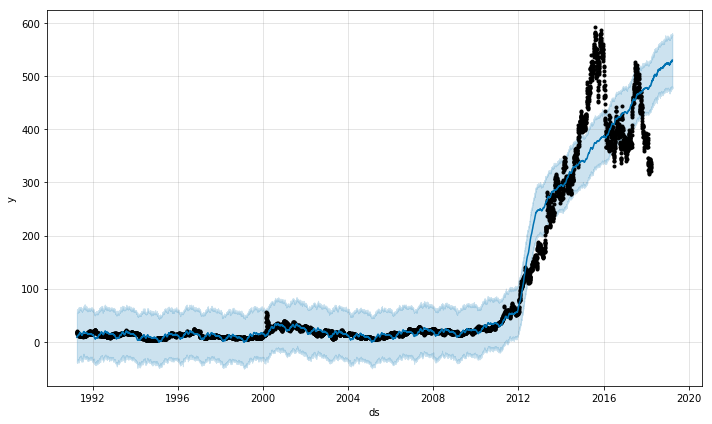

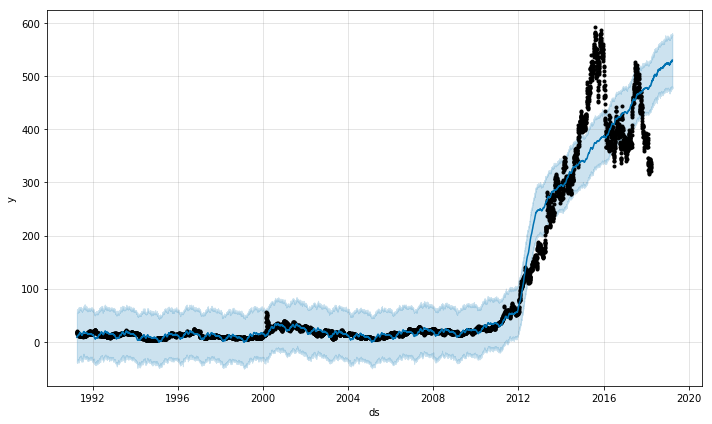

In [70]:
m.plot(forecast)